In [1]:
# utility libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# dataset
urban_df = pd.read_csv('urban population.csv')

'''choose for clustering because its very long dataset but we only choose two years for clustering'''
Df_urban = urban_df[["2016","2017"]].dropna()


# make arrary
X = Df_urban.values

In [14]:
'''desribe the choosen dataset'''
Df_urban.describe()

,2016,2017
count,262.000000,262.000000
mean,59.268123,59.586074
std,22.895441,22.841336
min,12.388000,12.706000
25%,40.814750,41.211574
50%,58.383313,59.012661
75%,78.224000,78.683000
max,100.000000,100.000000


In [15]:
from sklearn import preprocessing

'''Min Min Scaler is used for data normlization we use sklearn preprocessing for that '''

scaler = preprocessing.MinMaxScaler()
names = Df_urban.columns
d = scaler.fit_transform(Df_urban)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,2016,2017
0,0.351596,0.350391
1,0.256553,0.259197
2,0.144181,0.143698
3,0.376818,0.381622
4,0.590798,0.597212


E:\Files\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


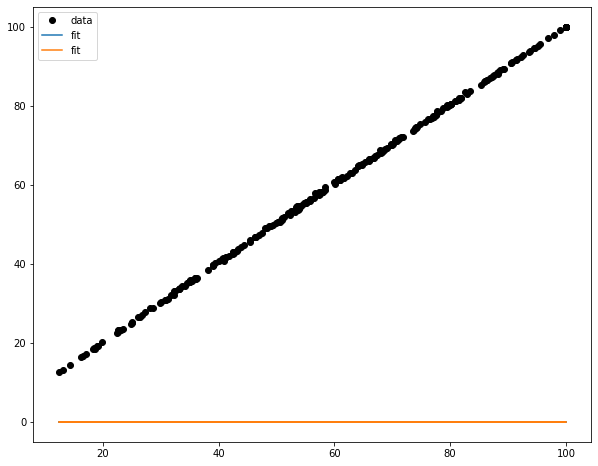

In [51]:

# fit using curve_fit()
'''fit the dataset using curve fit Import curve fitting package from scipy'''
from scipy.optimize import curve_fit

# x and y data for curve fit method

'''split in x and y'''

x = Df_urban["2016"]
y = Df_urban["2017"]

def temp(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
    
'''that above function is guassian function that is for fit the model using curve_fit'''
parameters, cov = curve_fit(temp,x, y)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = temp(Df_urban, fit_A, fit_B)

#     plotting
plt.figure(figsize=(10,8))
plt.plot(x, y,'o', label='data', color="black")
plt.plot(x, fit_y, '-', label='fit')
plt.legend()
plt.show()

In [36]:
# prediction for future values
from sklearn.cluster import KMeans

'''elbow method is used for finding possible numbers of clusters'''
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


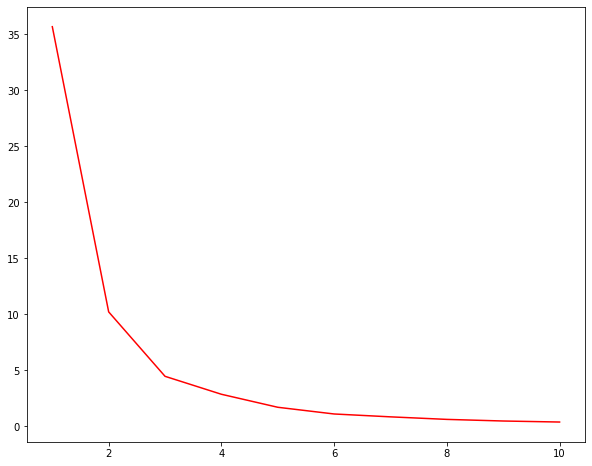

In [58]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss, color = "red")
plt.show()

In [52]:
'''here we use hierarichal clustering so, we use builtin library for that'''
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [53]:
y_hc = hc.fit_predict(X)

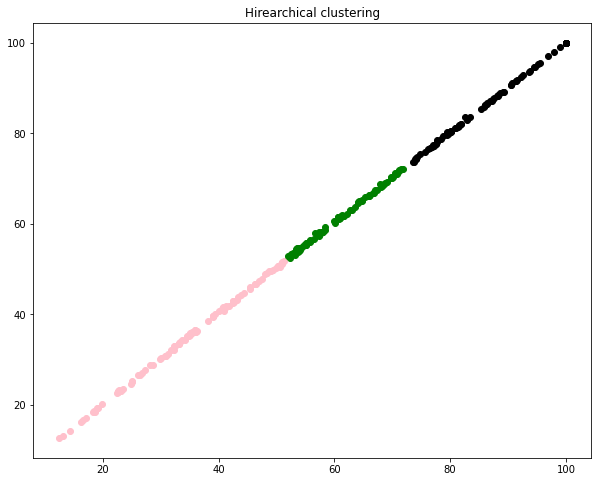

In [54]:
'''scatter is simple method to check clusters'''


plt.figure(figsize = (10,8))
plt.title("Hirearchical clustering")
#cluster 1
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], c="pink")
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], c="black")
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], c="green")
plt.show()



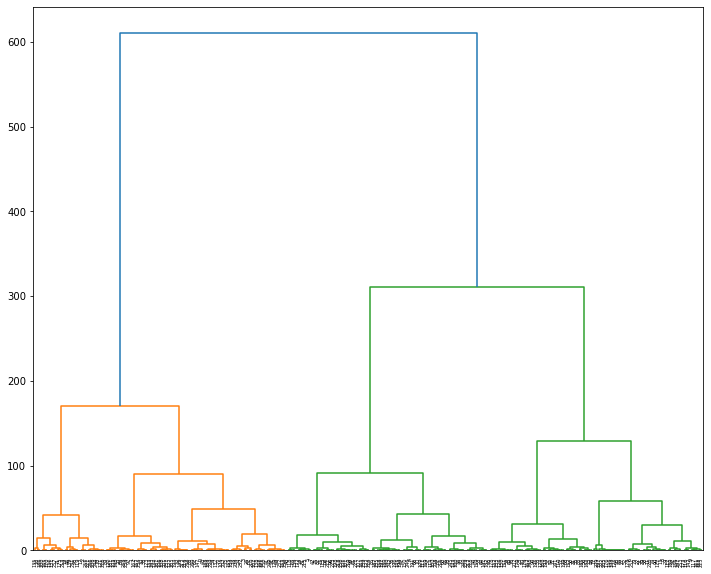

In [55]:
'''here we plotting hierarchial clustering using ward method this is dendrogram'''
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))